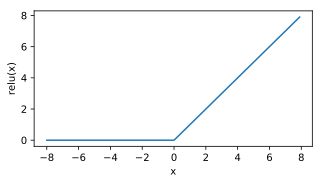

In [3]:
#MLP is based on hidden layers between inputs and outputs
#use activation function is not linear function
#

#ReLU
import d2lzh as d2l
from mxnet import autograd, nd

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.relu()
xyplot(x, y, 'relu')


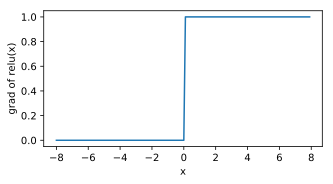

In [4]:
#derivate of ReLU
y.backward()
xyplot(x, x.grad, 'grad of relu')


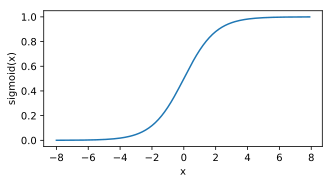

In [5]:
#sigmoid

with autograd.record():
    y = x.sigmoid()
xyplot(x, y, 'sigmoid')



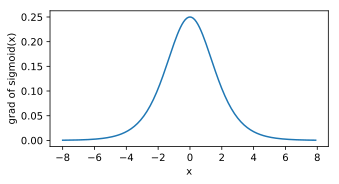

In [6]:
#derivate of sigmoid

y.backward()
xyplot(x, x.grad, 'grad of sigmoid')



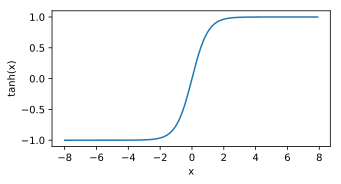

In [7]:
#tanh

with autograd.record():
    y = x.tanh()
xyplot(x, y, 'tanh')





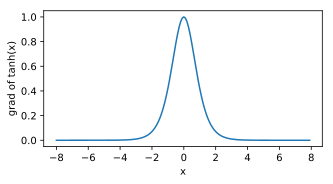

In [8]:
#derivate of tanh
y.backward()
xyplot(x, x.grad, 'grad of tanh')



In [9]:
#MLP have more than one hidden layer and use activation function



In [10]:
import d2lzh as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss



In [11]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)



In [17]:
num_inputs, num_outputs, num_hiddens = 784, 10, 1024

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()
    



In [18]:
#define activation function
def relu(X):
    return nd.maximum(X, 0)



In [19]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2



In [20]:
loss = gloss.SoftmaxCrossEntropyLoss()



In [21]:
#train model
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params, lr)



epoch 1, loss 0.7670, train acc 0.716, test acc 0.830
epoch 2, loss 0.4743, train acc 0.823, test acc 0.842
epoch 3, loss 0.4186, train acc 0.847, test acc 0.843
epoch 4, loss 0.3827, train acc 0.859, test acc 0.871
epoch 5, loss 0.3621, train acc 0.866, test acc 0.875
epoch 6, loss 0.3421, train acc 0.875, test acc 0.875
epoch 7, loss 0.3302, train acc 0.878, test acc 0.876
epoch 8, loss 0.3181, train acc 0.882, test acc 0.879
epoch 9, loss 0.3073, train acc 0.886, test acc 0.882
epoch 10, loss 0.2968, train acc 0.890, test acc 0.884
